BitCoin Data Set of Last 3 years [2017-01 to 2021-05] 

In [ ]:
# Import data set of 1 Hour BTC-USD [2017-01 to 2021-05]
import pandas as pd
import datetime
import glob

path = r'/content/Dataset' 

all_files = glob.glob(path + "/*.csv")
all_files = sorted(all_files)

data = pd.DataFrame()

for filename in all_files:

    df = pd.read_csv(filename,usecols=[1,2,3,4,5], names=['Open','High','Low','Close','Volume'])
    data = data.append(df,ignore_index=True)

data.head()


,Open,High,Low,Close,Volume
0,4178.00,4197.97,4148.99,4170.00,41.008989
1,4150.01,4200.01,4140.01,4200.00,35.261802
2,4200.00,4300.00,4185.00,4242.01,41.160565
3,4242.01,4270.00,4200.01,4230.00,26.294684
4,4239.99,4258.83,4200.02,4235.01,20.139359


Technical Indicators SMA, EMA, MACD, RSI, Momentum, Stochastic D% , Accumulation/distribution oscillator (A/D)

In [ ]:
import numpy as np

window_length=2

# Get just the  close
close = data['Close']
# Get the difference in price from previous step
delta = close.diff()
# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 


# Make the positive gains (up) and negative gains (down) Series RSI_EWMA
up, down = delta.clip(lower=0), delta.clip(upper=0)
roll_up1 = up.ewm(span=window_length).mean()
roll_down1 = down.abs().ewm(span=window_length).mean()
RS1 = roll_up1 / roll_down1
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

# Calculate the RSI based on SMA, RSI_SMA
roll_up2 = up.rolling(window_length).mean()
roll_down2 = down.abs().rolling(window_length).mean()
RS2 = roll_up2 / roll_down2
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

n = 2

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

# Technical Indicators 
data["SMA_2"] = data.Close.rolling(2).mean()
data["EMA_2"] =data.Close.ewm(span =2).mean()
data["Force_Index"] = data["Close"] * data["Volume"]
data["MACD"] = data.Close.ewm(span=5).mean() - data.Close.ewm(span=2).mean()

data['change'] = data['Close'].diff()
data['gain'] = data.change.mask(data.change < 0, 0.0)
data['loss'] = -data.change.mask(data.change > 0, -0.0)
data['avg_gain'] = rma(data.gain[n+1:].to_numpy(), n, np.nansum(data.gain.to_numpy()[:n+1])/n)
data['avg_loss'] = rma(data.loss[n+1:].to_numpy(), n, np.nansum(data.loss.to_numpy()[:n+1])/n)
data['rs'] = data.avg_gain / data.avg_loss
data['rsi_2'] = 100 - (100 / (1 + data.rs))

data["y"] = data["change"].apply(lambda x: 1 if x > 0.00 else 0)

data.tail()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


,Open,High,Low,Close,Volume,SMA_2,EMA_2,Force_Index,MACD,change,gain,loss,avg_gain,avg_loss,rs,rsi_2,y
32088,36694.27,36871.38,36510.01,36863.67,1963.402273,36778.970,36837.510578,7.237821e+07,-7.736724,169.40,169.40,0.00,106.235889,85.361055,1.244548,55.447591,1
32089,36865.75,36980.76,36557.30,36675.06,1697.834605,36769.365,36729.210193,6.226819e+07,48.992377,-188.61,0.00,188.61,53.117945,136.985528,0.387763,27.941596,0
32090,36677.85,37087.30,36623.01,36932.55,1483.171068,36803.805,36864.770064,5.477729e+07,-35.118351,257.49,257.49,0.00,155.303972,68.492764,2.267451,69.395102,1
32091,36932.55,37250.00,36863.28,37012.85,1679.621965,36972.700,36963.490021,6.216760e+07,-72.772213,80.30,80.30,0.00,117.801986,34.246382,3.439837,77.476653,1
32092,36879.23,37499.00,36800.93,37253.81,2649.154183,37133.330,37157.036674,9.869109e+07,-145.288135,240.96,240.96,0.00,179.380993,17.123191,10.475909,91.286093,1


In [ ]:
from sklearn.model_selection import train_test_split
data = data.drop(
   ["Open", "High", "Low", "Close", "Volume", "change","gain","loss","avg_gain","avg_loss",'rs'],
   axis=1,
).dropna()
# print(df)
X = data.drop(["y"], axis=1).values
y = data["y"].values

X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.4,
   shuffle=False,
)


In [ ]:
clf = BernoulliNB()
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6450116009280742


Accuracy of Bernouli Naive Bayes: 64.5%

Confusion Matrices of Bernouli Naive Bayes:

[[143  78]
 [ 75 135]]


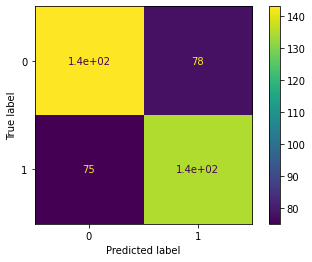


CLassification F1/Precision/Recall of Bernouli Naive Bayesr:

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       221
           1       0.63      0.64      0.64       210

    accuracy                           0.65       431
   macro avg       0.64      0.64      0.64       431
weighted avg       0.65      0.65      0.65       431



In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)
print("Accuracy of Bernouli Naive Bayes: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print("\nConfusion Matrices of Bernouli Naive Bayes:\n")

print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

print("\nCLassification F1/Precision/Recall of Bernouli Naive Bayesr:\n")
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression Classifier: 50.81%

Confusion Matrices of Logistic Regression Classifier:

[[156  65]
 [147  63]]


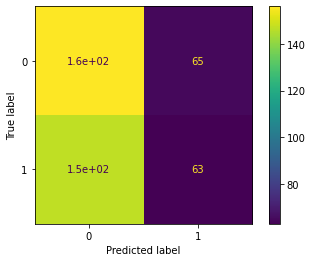


CLassification F1/Precision/Recall of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.51      0.71      0.60       221
           1       0.49      0.30      0.37       210

    accuracy                           0.51       431
   macro avg       0.50      0.50      0.48       431
weighted avg       0.50      0.51      0.49       431



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

logreg = LogisticRegression(max_iter=1000,C=1e5,dual=False)

model_lr = logreg.fit(X_train, y_train)
lr_pred = model_lr.predict(X_test)

print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(y_test, lr_pred)*100,2)))
print("\nConfusion Matrices of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test, lr_pred))
plot_confusion_matrix(model_lr, X_test, y_test)
plt.show()
print("\nCLassification F1/Precision/Recall of Logistic Regression Classifier:\n")
print(classification_report(y_test, lr_pred))


Accuracy of Random Forest: 84.45%

Confusion Matrices of Random Forest Classifier:

[[183  38]
 [ 29 181]]


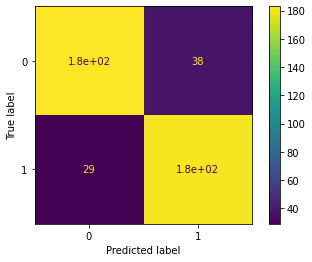


CLassification F1/Precision/Recall of Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       221
           1       0.83      0.86      0.84       210

    accuracy                           0.84       431
   macro avg       0.84      0.84      0.84       431
weighted avg       0.85      0.84      0.84       431



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(
   X_train,
   y_train,
)
y_pred = clf.predict(X_test)

print("Accuracy of Random Forest: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print("\nConfusion Matrices of Random Forest Classifier:\n")
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)
plt.show()
print("\nCLassification F1/Precision/Recall of Random Forest Classifier:\n")
print(classification_report(y_test, y_pred))